In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [2]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(np.__version__)

2.6.2
1.19.5


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

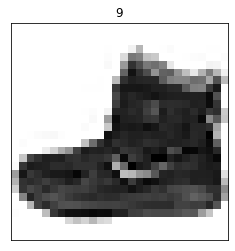

In [8]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(train_labels[0])
plt.xticks([])
plt.yticks([])
plt.show()

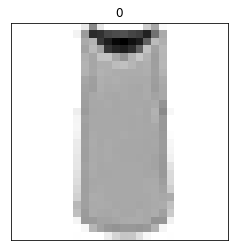

In [9]:
plt.imshow(train_images[2],cmap='gray_r')
plt.title(train_labels[2])
#plot 2th position data
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#giving the class names

In [11]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
class_names[9]

'Ankle boot'

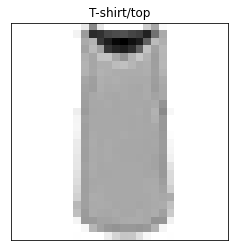

In [13]:
plt.imshow(train_images[2],cmap='gray_r')
plt.title(class_names[train_labels[2]])
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
train_labels[2]

0

In [15]:
class_names[train_labels[2]]

'T-shirt/top'

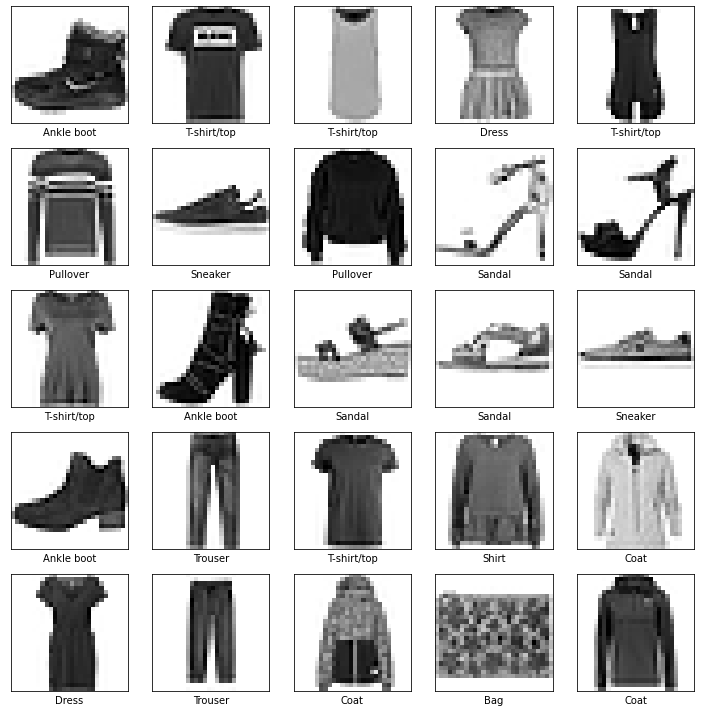

In [16]:
#plot 5x5 matrix to EDA - explore data- 551-5525
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [17]:
#transfer image data to 0-1 format
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
#create model
#this is another syntax if keras is not imported
#keras files are already added in tensorflow
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,'softmax')])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(train_images, train_labels,validation_split=0.2, epochs=50,verbose=1)
#validation_split will split test data in 20% to validate data
#It will also show the test/validation loss and accuracy along with train data
#verbose-0,1,2 is to display different output 
#store the values in history variable

Epoch 1/50
1500/1500 [==============================] - 12s 6ms/step - loss: 0.4902 - accuracy: 0.8248 - val_loss: 0.3944 - val_accuracy: 0.8563
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3678 - accuracy: 0.8669 - val_loss: 0.3643 - val_accuracy: 0.8683
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3312 - accuracy: 0.8772 - val_loss: 0.3407 - val_accuracy: 0.8766
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3058 - accuracy: 0.8870 - val_loss: 0.3152 - val_accuracy: 0.8856
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2859 - accuracy: 0.8930 - val_loss: 0.3327 - val_accuracy: 0.8832
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2691 - accuracy: 0.8995 - val_loss: 0.3250 - val_accuracy: 0.8859
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2543 - accuracy: 0.9050 - val_loss: 0.3315 - val_accuracy

In [22]:
#.history will give the data set which is stored as dictionary
#the keys are loss, accuracy, val_loss, val_accuracy
history.history

{'loss': [0.4902162551879883,
  0.36775073409080505,
  0.3311755657196045,
  0.30581116676330566,
  0.2859363257884979,
  0.26907697319984436,
  0.2543112635612488,
  0.2447354942560196,
  0.23404034972190857,
  0.2235298603773117,
  0.21529622375965118,
  0.20522408187389374,
  0.2012244611978531,
  0.19045862555503845,
  0.18516767024993896,
  0.17809686064720154,
  0.17404407262802124,
  0.16852064430713654,
  0.16073644161224365,
  0.15861743688583374,
  0.1537613421678543,
  0.1454397737979889,
  0.14390450716018677,
  0.13915562629699707,
  0.13295534253120422,
  0.13070644438266754,
  0.12763133645057678,
  0.12396225333213806,
  0.12132410705089569,
  0.11610058695077896,
  0.11449242383241653,
  0.11474371701478958,
  0.11178572475910187,
  0.1073395162820816,
  0.10521238297224045,
  0.10253627598285675,
  0.09697659313678741,
  0.09785860031843185,
  0.09710796177387238,
  0.09038443118333817,
  0.09414578229188919,
  0.08832632750272751,
  0.0867086872458458,
  0.0864569768

In [23]:
history.history['loss']

[0.4902162551879883,
 0.36775073409080505,
 0.3311755657196045,
 0.30581116676330566,
 0.2859363257884979,
 0.26907697319984436,
 0.2543112635612488,
 0.2447354942560196,
 0.23404034972190857,
 0.2235298603773117,
 0.21529622375965118,
 0.20522408187389374,
 0.2012244611978531,
 0.19045862555503845,
 0.18516767024993896,
 0.17809686064720154,
 0.17404407262802124,
 0.16852064430713654,
 0.16073644161224365,
 0.15861743688583374,
 0.1537613421678543,
 0.1454397737979889,
 0.14390450716018677,
 0.13915562629699707,
 0.13295534253120422,
 0.13070644438266754,
 0.12763133645057678,
 0.12396225333213806,
 0.12132410705089569,
 0.11610058695077896,
 0.11449242383241653,
 0.11474371701478958,
 0.11178572475910187,
 0.1073395162820816,
 0.10521238297224045,
 0.10253627598285675,
 0.09697659313678741,
 0.09785860031843185,
 0.09710796177387238,
 0.09038443118333817,
 0.09414578229188919,
 0.08832632750272751,
 0.0867086872458458,
 0.08645697683095932,
 0.08343483507633209,
 0.08266308903694153,

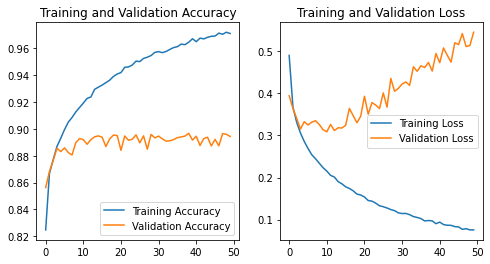

In [24]:
#store 50 in epochs variable as we ran 50 epochs
epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#create a range from 1-50
epochs_range = range(epochs)

#plot subplots for the training and test/validation accuracy and loss
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()
#This is a over fit model

In [25]:
# Early Stopping
model_new = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,'softmax')])
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_new.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history = model_new.fit(train_images, train_labels, epochs=50, validation_split=0.2,callbacks=callback,verbose=1)

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4902 - accuracy: 0.8253 - val_loss: 0.4029 - val_accuracy: 0.8591
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3665 - accuracy: 0.8655 - val_loss: 0.3755 - val_accuracy: 0.8629
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3301 - accuracy: 0.8790 - val_loss: 0.3725 - val_accuracy: 0.8687
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3062 - accuracy: 0.8862 - val_loss: 0.3611 - val_accuracy: 0.8665
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2859 - accuracy: 0.8942 - val_loss: 0.3193 - val_accuracy: 0.8826
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2695 - accuracy: 0.8998 - val_loss: 0.3199 - val_accuracy: 0.8854
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2559 - accuracy: 0.9038 - val_loss: 0.3270 - val_accuracy:

In [ ]:
epochs = 17
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()